#  Assignment 1B- CNN Network building


## Packages Required for analysis

I am installing all of the packages around Keras and Tensorflow- to satifsfy the scope of this assignment.

In [2]:
!pip install tensorflow
!pip install keras 

In [3]:
# Data packages
import pandas as pd
import numpy as np

# Image manipulation
from PIL import Image

# Other system packages
import os

#
from matplotlib import pyplot

# Keras functions 
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

F:\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## The fashion data set

The 'Fashion MNIST' dataset which contains 60,000 training images and 10,000 test images is imported here

In [4]:
# Set the dataset directory
dataset_dir = os.getcwd() 
print(dataset_dir)

C:\Users\Gautham Bharathi


In [5]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
Fashion MNIST train -  rows: 60000  columns: 28
Fashion MNIST test -  rows: 10000  columns: 28


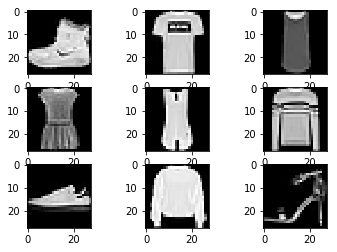

In [6]:

#show_shapes(X_train, y_train, X_test, y_test)
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1])
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# The CSV files

The training and test CSV files from kaggle is imported here

In [13]:

data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [14]:
print("Fashion MNIST train -  rows:",data_train.shape[0]," columns:", data_train.shape[1])
print("Fashion MNIST test -  rows:",data_test.shape[0]," columns:", data_test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


# The data preparation

A data dictionary is created for each type of Label: (from 0 to 9 i.e)

In [15]:

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


In [16]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1) ## Channel Depth is 1 for gray scale
NUM_CLASSES = 10 ## Number of Labels

In [17]:
def standarise_data(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [18]:

X, y = standarise_data(data_train)
X_val, y_val = standarise_data(data_test)


In [19]:
## Spliting data by training and validation set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST test  -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])


Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST test  -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 10000  columns: (28, 28, 1)


In [21]:
print("Fashion MNIST train -  rows:",y_train.shape[0]," columns:", y_train.shape[1])
print("Fashion MNIST test  -  rows:",y_test.shape[0]," columns:", y_test.shape[1])
print("Fashion MNIST valid -  rows:",y_val.shape[0]," columns:", y_val.shape[1])

Fashion MNIST train -  rows: 48000  columns: 10
Fashion MNIST test  -  rows: 12000  columns: 10
Fashion MNIST valid -  rows: 10000  columns: 10


#  Building CNN Models

##  A Simple CNN

A CNN architechture with:

* Conv > Conv (Relu) 32 filters.
* Max Pooling (size 2)
* Fully connected layer of size 64
* Fully connected layer of size 10- based on number of labels.
    * Softmax activation for multi-class classification output

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="same")) #You could add activations inside this if you like, or as a separate layer
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=2))


model.add(Flatten()) # Stretching out for our FC layer
model.add(Dense(64))
model.add(Activation("relu"))
		
# Target Label classifier
model.add(Dense(NUM_CLASSES))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                401472    
__________

In [24]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(), metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 213s 4ms/step - loss: 0.4105 - acc: 0.8562 - val_loss: 0.2976 - val_acc: 0.8929
Epoch 2/5
48000/48000 [==============================] - 208s 4ms/step - loss: 0.2562 - acc: 0.9080 - val_loss: 0.2525 - val_acc: 0.9095
Epoch 3/5
48000/48000 [==============================] - 201s 4ms/step - loss: 0.2051 - acc: 0.9247 - val_loss: 0.2545 - val_acc: 0.9090
Epoch 4/5
48000/48000 [==============================] - 160s 3ms/step - loss: 0.1659 - acc: 0.9386 - val_loss: 0.2344 - val_acc: 0.9181
Epoch 5/5
48000/48000 [==============================] - 152s 3ms/step - loss: 0.1341 - acc: 0.9506 - val_loss: 0.2345 - val_acc: 0.9190


The Score

In [26]:

score = model.evaluate(X_val, y_val, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22400353236496448
Test accuracy: 0.9223


The Raw probablilites- Negative and positive classes

In [27]:
# We can also get raw probabilities

# Let's set a nice print option
np.set_printoptions(suppress=True)

predictions = model.predict_proba(X_val)
predictions[0:5]



array([[0.9997832 , 0.00000034, 0.00003356, 0.00000043, 0.00000054,
        0.00000001, 0.00018174, 0.00000002, 0.00000015, 0.        ],
       [0.        , 0.9999994 , 0.        , 0.00000037, 0.        ,
        0.0000002 , 0.00000002, 0.        , 0.        , 0.        ],
       [0.04104551, 0.00000121, 0.8725083 , 0.00000315, 0.00003742,
        0.00003346, 0.0863679 , 0.00000048, 0.0000017 , 0.00000085],
       [0.00084761, 0.00148903, 0.00404717, 0.        , 0.00167777,
        0.00000004, 0.0000949 , 0.00000013, 0.99184096, 0.00000241],
       [0.00014397, 0.00005167, 0.00007713, 0.9935761 , 0.00537836,
        0.0000019 , 0.00030595, 0.00000195, 0.00046132, 0.00000169]],
      dtype=float32)

In [28]:
predictions[:,1].shape # Slicing out the positive classes

(10000,)

In [29]:
predictions[:,1][0:5]

array([0.00000034, 0.9999994 , 0.00000121, 0.00148903, 0.00005167],
      dtype=float32)

The class predictions


In [30]:
predictions_classes = model.predict_classes(X_val)
predictions_classes[0:5]

array([0, 1, 2, 8, 3], dtype=int64)

Precision,Recall and f1 score

In [31]:

y_true = data_test.iloc[:, 0]
p = predictions_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [32]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9223
Incorrect predicted classes: 777


In [33]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predictions_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.85      0.89      0.87      1000
    Class 1 (Trouser) :       0.98      1.00      0.99      1000
   Class 2 (Pullover) :       0.91      0.86      0.88      1000
      Class 3 (Dress) :       0.93      0.93      0.93      1000
       Class 4 (Coat) :       0.88      0.91      0.90      1000
     Class 5 (Sandal) :       0.99      0.96      0.98      1000
      Class 6 (Shirt) :       0.80      0.76      0.78      1000
    Class 7 (Sneaker) :       0.96      0.95      0.95      1000
        Class 8 (Bag) :       0.98      0.98      0.98      1000
 Class 9 (Ankle Boot) :       0.94      0.98      0.96      1000

              micro avg       0.92      0.92      0.92     10000
              macro avg       0.92      0.92      0.92     10000
           weighted avg       0.92      0.92      0.92     10000



## A Deep CNN - 6 Convolutional layers

In [35]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding="same", input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=2))
# Conv + Maxpooling
model.add(Conv2D(filters=64, kernel_size=3, padding="same"))
# Normalization
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=2))
# Dropout
model.add(Dropout(0.25))

# Conv + Maxpooling
model.add(Conv2D(filters=128, kernel_size=3, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=128, kernel_size=3, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=2))
# Dropout
model.add(Dropout(0.25))


 # Converting 3D feature to 1D feature Vektor
model.add(Flatten()) # Stretching out for our FC layer
# Fully Connected Layer
model.add(Dense(64))
model.add(Activation("relu"))
# Dropout
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))

# Sigmoid classifier
model.add(Dense(NUM_CLASSES))
model.add(Activation("softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(), metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_test, y_test),
                   batch_size = 64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 977s 20ms/step - loss: 0.7765 - acc: 0.7150 - val_loss: 0.4639 - val_acc: 0.8462
Epoch 2/20
48000/48000 [==============================] - 815s 17ms/step - loss: 0.4846 - acc: 0.8252 - val_loss: 0.3323 - val_acc: 0.8838
Epoch 3/20
48000/48000 [==============================] - 1064s 22ms/step - loss: 0.4160 - acc: 0.8500 - val_loss: 0.3181 - val_acc: 0.8948
Epoch 4/20
48000/48000 [==============================] - 875s 18ms/step - loss: 0.3640 - acc: 0.8727 - val_loss: 0.2979 - val_acc: 0.9007
Epoch 5/20
48000/48000 [==============================] - 935s 19ms/step - loss: 0.3289 - acc: 0.8837 - val_loss: 0.3123 - val_acc: 0.8884
Epoch 6/20
48000/48000 [==============================] - 1264s 26ms/step - loss: 0.3047 - acc: 0.8938 - val_loss: 0.2701 - val_acc: 0.9092
Epoch 7/20
48000/48000 [==============================] - 1264s 26ms/step - loss: 0.2861 - acc: 0.8991 - val_loss:

In [39]:
model.save_weights('cnn6_model.h5')

## Model Evaluation

In [40]:

score = model.evaluate(X_val, y_val, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20516432357430459
Test accuracy: 0.9344


## Predicting the output

In [41]:

predictions = model.predict_proba(X_val)
predictions_classes = model.predict_classes(X_val)


In [42]:
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
p = predictions_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [43]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9344
Incorrect predicted classes: 656


Precision, recall and f1 score

In [44]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predictions_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.92      0.85      0.89      1000
    Class 1 (Trouser) :       1.00      0.99      0.99      1000
   Class 2 (Pullover) :       0.90      0.92      0.91      1000
      Class 3 (Dress) :       0.90      0.96      0.93      1000
       Class 4 (Coat) :       0.94      0.87      0.90      1000
     Class 5 (Sandal) :       1.00      0.96      0.98      1000
      Class 6 (Shirt) :       0.79      0.86      0.82      1000
    Class 7 (Sneaker) :       0.97      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.95      0.99      0.97      1000

              micro avg       0.93      0.93      0.93     10000
              macro avg       0.94      0.93      0.93     10000
           weighted avg       0.94      0.93      0.93     10000



## Transfer learning- using ResNet 50



ResNet 50 can be of great aid to see how well a prebuilt model performs on Imagenet. To leverage ResNet 50 the images have to be reshaped.

### Setting up ResNet 50

In [45]:
## First instance
from keras.applications.resnet50 import ResNet50

ResNet50_prebuilt = ResNet50(weights='imagenet', include_top=False, input_shape=[224, 224, 3])

F:\Python\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 97s 1us/step


Using Image Generator to reshape Images

In [50]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(
    directory=r"train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 60000 images belonging to 10 classes.


In [61]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"val/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 7500 images belonging to 1 classes.


In [63]:
test_generator = test_datagen.flow_from_directory(
    directory=r"test/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 2500 images belonging to 1 classes.


In [64]:
import pickle

# Saving this out for use
with open('resNet50_model.pickle', 'wb') as file_out:
    pickle.dump(ResNet50_prebuilt, file_out)
    file_out.close()

Model summary

In [65]:
# Load data (deserialize)
with open('resNet50_model.pickle', 'rb') as file_in:
    ResNet50_prebuilt = pickle.load(file_in)

F:\Python\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [66]:
ResNet50_prebuilt.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [75]:
score =ResNet50_prebuilt.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

RuntimeError: You must compile your model before using it.